In [2]:
from pyspark.sql import SparkSession
from pyspark.context import SparkContext
import os

In [3]:
spark = SparkSession.builder.master('local').appName('Test_Spark').getOrCreate()

In [4]:
### Check if Apache Spark is working or not
spark

In [5]:
# Read the dataset
df_pyspark = spark.read.csv('SalaryData.csv', header=True, inferSchema=True)

In [6]:
df_pyspark.dtypes

[('Age', 'int'),
 ('Gender', 'int'),
 ('EducationLevel', 'int'),
 ('YearsExperience', 'double'),
 ('Salary', 'int')]

In [7]:
df_pyspark.show()

+---+------+--------------+---------------+------+
|Age|Gender|EducationLevel|YearsExperience|Salary|
+---+------+--------------+---------------+------+
| 32|     0|             0|            5.0| 90000|
| 28|     1|             1|            3.0| 65000|
| 45|     0|             2|           15.0|150000|
| 36|     1|             0|            7.0| 60000|
| 52|     0|             1|           20.0|200000|
| 29|     0|             0|            2.0| 55000|
| 42|     1|             1|           12.0|120000|
| 31|     0|             0|            4.0| 80000|
| 26|     1|             0|            1.0| 45000|
| 38|     0|             2|           10.0|110000|
| 29|     0|             1|            3.0| 75000|
| 48|     1|             0|           18.0|140000|
| 35|     0|             0|            6.0| 65000|
| 40|     1|             1|           14.0|130000|
| 27|     0|             0|            2.0| 40000|
| 44|     0|             0|           16.0|125000|
| 33|     1|             1|    

In [8]:
from pyspark.ml.feature import VectorAssembler

featureAssembler = VectorAssembler(inputCols=['Age','Gender','EducationLevel','YearsExperience'], outputCol='Independent_Features')

c:\Users\A\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
output = featureAssembler.transform(df_pyspark);

In [10]:
output.show()

+---+------+--------------+---------------+------+--------------------+
|Age|Gender|EducationLevel|YearsExperience|Salary|Independent_Features|
+---+------+--------------+---------------+------+--------------------+
| 32|     0|             0|            5.0| 90000|  [32.0,0.0,0.0,5.0]|
| 28|     1|             1|            3.0| 65000|  [28.0,1.0,1.0,3.0]|
| 45|     0|             2|           15.0|150000| [45.0,0.0,2.0,15.0]|
| 36|     1|             0|            7.0| 60000|  [36.0,1.0,0.0,7.0]|
| 52|     0|             1|           20.0|200000| [52.0,0.0,1.0,20.0]|
| 29|     0|             0|            2.0| 55000|  [29.0,0.0,0.0,2.0]|
| 42|     1|             1|           12.0|120000| [42.0,1.0,1.0,12.0]|
| 31|     0|             0|            4.0| 80000|  [31.0,0.0,0.0,4.0]|
| 26|     1|             0|            1.0| 45000|  [26.0,1.0,0.0,1.0]|
| 38|     0|             2|           10.0|110000| [38.0,0.0,2.0,10.0]|
| 29|     0|             1|            3.0| 75000|  [29.0,0.0,1.

In [11]:
finalData = output.select('Independent_Features', 'Salary')
print(finalData)

DataFrame[Independent_Features: vector, Salary: int]


In [12]:
finalData.show()

+--------------------+------+
|Independent_Features|Salary|
+--------------------+------+
|  [32.0,0.0,0.0,5.0]| 90000|
|  [28.0,1.0,1.0,3.0]| 65000|
| [45.0,0.0,2.0,15.0]|150000|
|  [36.0,1.0,0.0,7.0]| 60000|
| [52.0,0.0,1.0,20.0]|200000|
|  [29.0,0.0,0.0,2.0]| 55000|
| [42.0,1.0,1.0,12.0]|120000|
|  [31.0,0.0,0.0,4.0]| 80000|
|  [26.0,1.0,0.0,1.0]| 45000|
| [38.0,0.0,2.0,10.0]|110000|
|  [29.0,0.0,1.0,3.0]| 75000|
| [48.0,1.0,0.0,18.0]|140000|
|  [35.0,0.0,0.0,6.0]| 65000|
| [40.0,1.0,1.0,14.0]|130000|
|  [27.0,0.0,0.0,2.0]| 40000|
| [44.0,0.0,0.0,16.0]|125000|
|  [33.0,1.0,1.0,7.0]| 90000|
| [39.0,0.0,2.0,12.0]|115000|
|  [25.0,1.0,0.0,0.0]| 35000|
| [51.0,0.0,0.0,22.0]|180000|
+--------------------+------+
only showing top 20 rows



In [13]:
from pyspark.ml.regression import LinearRegression

In [14]:
### Training Data = 75% and Testing Data = 25%
trainingData, testingData = finalData.randomSplit([0.75, 0.25])

In [15]:
trainingData, testingData = finalData.randomSplit([0.75, 0.25])

### labelCol is the output column
regressor = LinearRegression(featuresCol='Independent_Features', labelCol='Salary')
regressor = regressor.fit(trainingData)
testingData

DataFrame[Independent_Features: vector, Salary: int]

In [16]:
### Coefficients of the regressor
regressor.coefficients

DenseVector([2144.1006, -7597.0658, 12734.2975, 3778.2463])

In [17]:
### Intercepts of the regressor
regressor.intercept

-20486.506970438033

In [18]:
### Predict the results
predictedResults = regressor.evaluate(testingData)

In [19]:
predictedResults.predictions.show()

+--------------------+------+------------------+
|Independent_Features|Salary|        prediction|
+--------------------+------+------------------+
|      (4,[0],[25.0])| 35000|33116.006846455115|
|  [23.0,1.0,0.0,0.5]| 35000|23119.863045330287|
|  [26.0,0.0,0.0,1.0]| 35000|39038.353652157515|
|  [26.0,1.0,0.0,1.0]| 40000|31441.287829870806|
|  [26.0,1.0,0.0,1.0]| 45000|31441.287829870806|
|  [26.0,1.0,1.0,1.5]| 45000|46064.708493521975|
|  [28.0,0.0,0.0,2.0]| 40000| 47104.80101053565|
|  [28.0,0.0,0.0,2.0]| 40000| 47104.80101053565|
|  [28.0,1.0,0.0,3.0]| 45000|43285.981441275624|
|  [29.0,0.0,0.0,1.5]|   350|47359.778436698034|
|  [29.0,1.0,0.0,1.5]| 35000| 39762.71261441133|
|  [29.0,1.0,0.0,2.0]| 40000| 41651.83574092467|
|  [29.0,1.0,0.0,2.0]| 40000| 41651.83574092467|
|  [30.0,0.0,0.0,2.0]| 40000|51393.002115887095|
|  [30.0,0.0,0.0,2.0]| 50000|51393.002115887095|
|  [30.0,0.0,0.0,3.0]| 45000| 55171.24836891377|
|  [30.0,1.0,0.0,2.0]| 40000| 43795.93629360039|
|  [30.0,1.0,0.0,3.0

In [20]:
trainingSummary = regressor.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 15663.280695
r2: 0.889351


In [21]:
import matplotlib.pyplot as plt

In [22]:
linearRegressionPrediction = regressor.transform(testingData).select('Salary', 'prediction')

In [23]:
### Converting the PySpark dataframe to a Pandas dataframe
lrPredictionDF = linearRegressionPrediction.toPandas().sort_values('Salary')

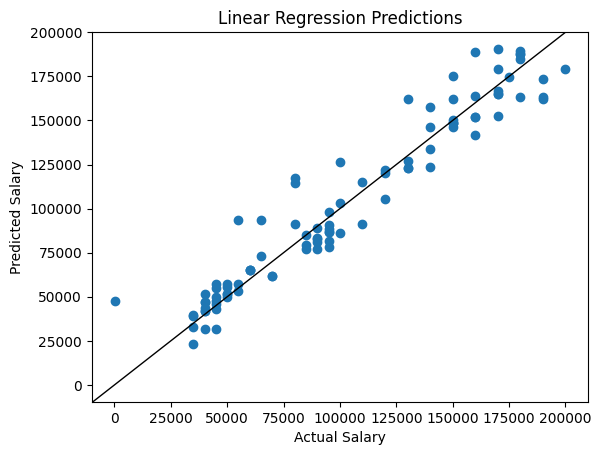

In [24]:
# Plot the actual vs predicted values as a scatter plot
plt.scatter(lrPredictionDF['Salary'], lrPredictionDF['prediction'])
plt.axline((0, 0), slope=1, linewidth=1, color='k')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Linear Regression Predictions')
plt.show()